# Income inequality as a function of tax revenue

This notebook aims to find the effect that total tax revenue has on the level of income inequality in countries with high quality of life.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

We read in world development indicators from the world bank. This data set can be found at https://www.kaggle.com/worldbank/world-development-indicators

In [2]:
data=pd.read_csv('./world-development-indicators/Indicators.csv')

We then narrow our table down to include only the top 20 countries by social progress index, a measure of quality of life, (see http://www.socialprogressindex.com/assets/downloads/resources/en/English-2017-Social-Progress-Index-Findings-Report_embargo-d-until-June-21-2017.pdf) 

In [3]:
qol_list=['Australia','Austria','Belgium','Canada','Denmark','Finland','France','Germany','Iceland','Ireland','Netherlands','Norway','Portugal','Slovenia','Spain','Sweden','Switzerland','United Kingdom','United States']

In [91]:
missing=['New Zealand','Japan']

note: we did not have complete data for New Zealand and Japan, so these countries have been omitted

In [4]:
QOL=data[data['CountryName'].isin(qol_list)]

2010 is the most recent year for which we have all the relevant data, so we will restrict our analysis to that year and compare indicators across countries

In [5]:
Ind_by_country2010=QOL[QOL['Year']==2010].pivot_table(index='CountryName',columns='IndicatorName',values="Value")


We are curious to see the relation between a countries total tax revenue as a percent of GDP and income inequality. As a measure of income inequality we calculate the income share held by the bottom 60% of earners in that country.

In [6]:
Ind_by_country2010['Income share held by lowest 60%']=Ind_by_country2010['Income share held by lowest 20%']+Ind_by_country2010['Income share held by fourth 20%']+Ind_by_country2010['Income share held by third 20%']

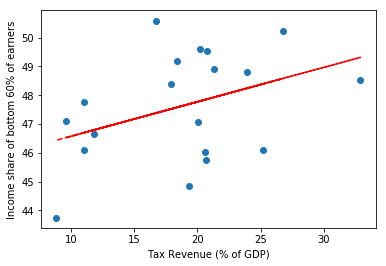

In [8]:
plt.scatter(Ind_by_country2010['Tax revenue (% of GDP)'],Ind_by_country2010['Income share held by lowest 60%'])
plt.xlabel('Tax Revenue (% of GDP)')
plt.ylabel('Income share of bottom 60% of earners')
z = np.polyfit(Ind_by_country2010['Tax revenue (% of GDP)'], Ind_by_country2010['Income share held by lowest 60%'], 1)
p = np.poly1d(z)
plt.plot(Ind_by_country2010['Tax revenue (% of GDP)'],p(Ind_by_country2010['Tax revenue (% of GDP)']),"r--")


After plotting these two quantities, we notice a slight postitive correlation. We quanitfy the correlation using the pearson coefficient

In [122]:
Ind_by_country2010['Tax revenue (% of GDP)'].corr(Ind_by_country2010['Income share held by lowest 60%'])

0.3950679787806027

Additionally, we can us the share of income held by the top 10% as our measure of inequality, plotting:

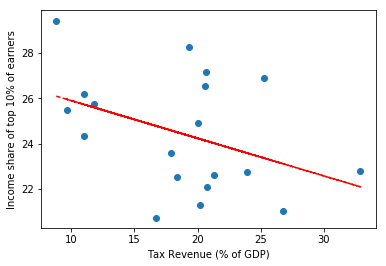

In [10]:
plt.scatter(Ind_by_country2010['Tax revenue (% of GDP)'],Ind_by_country2010['Income share held by highest 10%'])
plt.xlabel('Tax Revenue (% of GDP)')
plt.ylabel('Income share of top 10% of earners')
z = np.polyfit(Ind_by_country2010['Tax revenue (% of GDP)'], Ind_by_country2010['Income share held by highest 10%'], 1)
p = np.poly1d(z)
plt.plot(Ind_by_country2010['Tax revenue (% of GDP)'],p(Ind_by_country2010['Tax revenue (% of GDP)']),"r--")



In [125]:
Ind_by_country2010['Tax revenue (% of GDP)'].corr(Ind_by_country2010['Income share held by highest 10%'])

-0.4081408846825898

We notice a similar correlation between these two quantities in the negative direction.